In [271]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import calendar

In [272]:
# reading csv file (change date to datetime obj)
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'])

In [273]:
# Looking at examples of data fields
df.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


<font color='#9999ff'> **Task: Set index to the date column**</font>

In [274]:
df.set_index('date', inplace=True)

<font color='#9999ff'> **Task: Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.**</font>

We select using the 'quantile()' function to get the percentiles

In [275]:
# Select dates that we wish to keep (HIGHER OR EQUAL to 2.5th percentile) and (LOWER OR EQUAL to 97.5th percentile).
df = df[ (df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975)) ]

# print check
df.shape

(1238, 1)

<font color='#9999ff'> **Task: Draw a line chart similar to the one below.**</font>

<div>
<img src="Example%20pictures/Figure_1.png" width="900" height="400"/>
</div>

It should show average daily page views for each month grouped by year.

The title should be 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019'  

Labels on x axis and y axis should be 'Date' and 'Page Views'

Text(0, 0.5, 'Page Views')

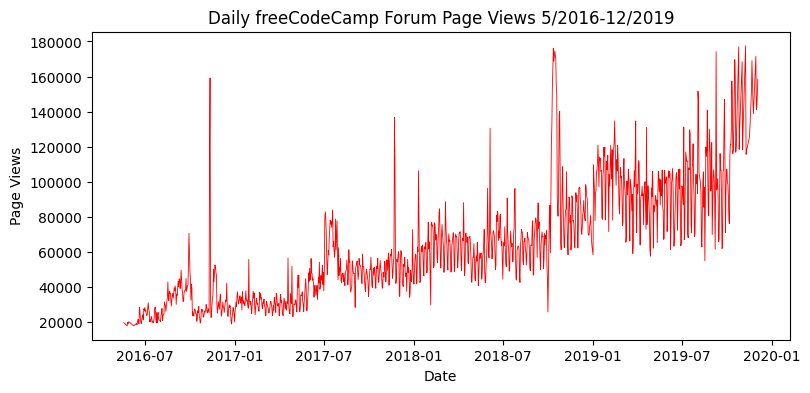

In [277]:
# Using matplotlib (change figure size)
fig_line, ax_line = plt.subplots(figsize=(9, 4))

# plot x axis, y axis
ax_line.plot(df.index, df['value'], color='r', linewidth=0.6)

# set title, x and y labels
ax_line.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax_line.set_xlabel('Date')
ax_line.set_ylabel('Page Views')

<font color='#9999ff'> **Task: Create a bar plot similar to the plot below.**</font>

<div>
<img src="Example%20pictures/Figure_2.png" width="700" height="500"/>
</div>

It should show average daily page views for each month grouped by year.  

The legend should show month labels and have a title of 'Months'.  

Labels for x and y axis should be 'Years' and 'Average Page Views'.

We first create a variable to hold datetime (from index)

In [278]:
datetime = pd.DataFrame(df.index)

Creating 2 new column for month and year and populate columns with data

In [279]:
df['year'] = list(datetime['date'].dt.year)
df['month'] = list(datetime['date'].dt.month)

Pivoting the table  
docs: https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html

'value' -- which column's value do we want?
'index' -- how do we want to index the data?
'columns' -- on what do we which to split by?
'aggfunc' -- how do we wish to transform the numbers for 'value'?
Can think of columns as the little bars and the index as the grouping

In [280]:
df_pivot = df.pivot_table(values='value', index='year', columns='month', aggfunc=np.mean)

# print check
df_pivot.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


Plotting a grouped bar chart

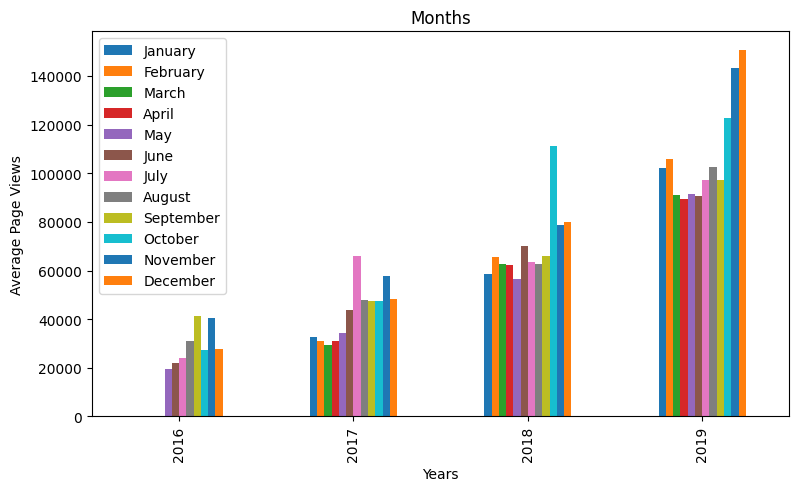

In [281]:
# setting legend labels
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

# plot and return an axis object as 'ax_bar'
ax_bar = df_pivot.plot.bar(figsize=(9, 5))
ax_bar.set(title='Months', xlabel='Years', ylabel='Average Page Views')
ax_bar.legend(months)

# create a figure with out an axis
fig_bar = plt.figure(1, 1)

# append ax_bar as an axis obj to fig_bar
fig_bar.axes.append(fig_bar)

<font color='#9999ff'> **Task: Create a box plot with Seaborn that draws two adjacent box plots similar to the one below.**</font>

<div>
<img src="Example%20pictures/Figure_3.png" width="900" height="500"/>
</div>

These box plots should show how the values are distributed within a given year or month and how it compares over time.  

Title of the first chart should be 'Year-wise Box Plot (Trend)'.  
Title of the second chart should be 'Month-wise Box Plot (Seasonality)'.

Converting month from int to string (short)

In [282]:
df['month'] = [calendar.month_abbr[mnth_int] for mnth_int in df['month']]



Creating Chart

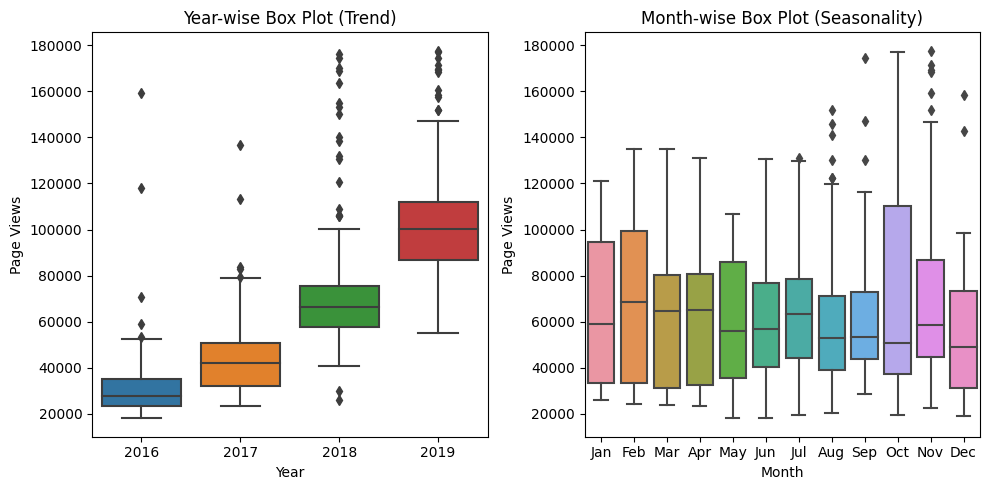

In [283]:
# create a figure with 2 sub plots
fig_box, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plotting first axis (left chart)
ax1 = sns.boxplot(data=df, x='year', y='value', ax=ax1)
ax1.set(title='Year-wise Box Plot (Trend)', xlabel='Year', ylabel='Page Views')


# Plotting second axis (right chart)
months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov', 'Dec']

ax2 = sns.boxplot(data=df, x='month', y='value', order=months_order, ax=ax2)
ax2.set(title='Month-wise Box Plot (Seasonality)',  xlabel='Month', ylabel = 'Page Views')

fig_box.tight_layout()